In [2]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap

In [3]:
dir_file_path = './sciviz/dotnc/th_2021.nc'
dir = Dataset(dir_file_path, mode='r')

speed_file_path = './sciviz/dotnc/vs_2021.nc'
speed = Dataset(speed_file_path, mode='r')

In [4]:
# Extract variables
lon = dir.variables['lon'][:]
lat = dir.variables['lat'][:]
day = dir.variables['day'][:]

In [11]:
day_index = 152 #for june 1


wind_speed = speed.variables['wind_speed'][day_index][:]
wind_dir = dir.variables['wind_from_direction'][day_index][:]
# print(wind_speed)

In [16]:
wind_rad = np.deg2rad(wind_dir)

U = np.sin(wind_rad)
V = np.cos(wind_rad)

# Normalize U and V components to make all arrows the same length
U = U / np.sqrt(U**2 + V**2)
V = V / np.sqrt(U**2 + V**2)

In [17]:
num_arrows = 300
step_lon = len(lon) // int(np.sqrt(num_arrows))
step_lat = len(lat) // int(np.sqrt(num_arrows))

selected_lon_indices = np.arange(0, len(lon), step_lon)[:int(np.sqrt(num_arrows))]
selected_lat_indices = np.arange(0, len(lat), step_lat)[:int(np.sqrt(num_arrows))]

# Create a meshgrid for the selected arrows
sample_lon, sample_lat = np.meshgrid(lon[selected_lon_indices], lat[selected_lat_indices])

# Extract corresponding U and V values
U_sample = U[selected_lat_indices[:, None], selected_lon_indices]
V_sample = V[selected_lat_indices[:, None], selected_lon_indices]
speed_sample = wind_speed[selected_lat_indices[:, None], selected_lon_indices]

In [18]:

def plot_color():
    plt.figure(figsize=(10, 7))  # Increased figure size

    # Create Basemap instance
    m = Basemap(llcrnrlon=-123, llcrnrlat=20, urcrnrlon=-62, urcrnrlat=50,
                projection='lcc', lat_1=33, lat_2=45, lat_0=39.5, lon_0=-98)



    # # Draw map features with transparency
    # m.drawmapboundary(fill_color='aqua')
    m.drawmapboundary(fill_color='#A6CAE0') 
    m.fillcontinents(color='#E1DCBD', lake_color='#A6CAE0', alpha=0.7)
    m.drawcoastlines(color='#404040', linewidth=0.8)  # Darker, thinner coastlines
    m.drawcountries(color='#404040', linewidth=0.6)

    m.drawparallels(np.arange(20,51,10), labels=[1,0,0,0], fontsize=8, color='#808080', linewidth=0.5)
    m.drawmeridians(np.arange(-120,-60,10), labels=[0,0,0,1], fontsize=8, color='#808080', linewidth=0.5)

    # # Convert lat/lon to map coordinates for plotting
    x, y = m(sample_lon, sample_lat)

    # print(y)


    # Plot quiver with dramatically modified parameters
    q = m.quiver(x, y, U_sample, V_sample, speed_sample,
                cmap=plt.cm.viridis,  # Modern colormap that works well for wind data
                scale=35,  # Adjusted scale for better arrow visibility
                width=0.004,  # Thinner arrows
                headwidth=3,  # More pronounced arrow heads
                headlength=4,
                headaxislength=4,
                alpha=0.9)  # Slight transparency for better overlap


    plt.colorbar(q, label='Wind Speed (m/s)',
                orientation='vertical',
                fraction=0.046, aspect=10)


    plt.title("Wind Direction Analysis\nContinental United States - June 1, 2006",
            fontsize=14, pad=20, fontweight='bold')

    # Adjust layout to prevent cutting off
    plt.tight_layout()

    plt.show()

In [19]:
def plot_length():
    plt.figure(figsize=(10, 7))  # Increased figure size

    # Create Basemap instance
    m = Basemap(llcrnrlon=-123, llcrnrlat=20, urcrnrlon=-62, urcrnrlat=50,
                projection='lcc', lat_1=33, lat_2=45, lat_0=39.5, lon_0=-98)



    # # Draw map features with transparency
    # m.drawmapboundary(fill_color='aqua')
    m.drawmapboundary(fill_color='#A6CAE0') 
    m.fillcontinents(color='#E1DCBD', lake_color='#A6CAE0', alpha=0.7)
    m.drawcoastlines(color='#404040', linewidth=0.8)  # Darker, thinner coastlines
    m.drawcountries(color='#404040', linewidth=0.6)

    m.drawparallels(np.arange(20,51,10), labels=[1,0,0,0], fontsize=8, color='#808080', linewidth=0.5)
    m.drawmeridians(np.arange(-120,-60,10), labels=[0,0,0,1], fontsize=8, color='#808080', linewidth=0.5)

    x, y = m(sample_lon, sample_lat)

    U_normalized = U_sample * speed_sample      
    V_normalized = V_sample * speed_sample

    q = m.quiver(x, y, U_normalized, V_normalized,
                color='blue',  # Modern colormap that works well for wind data
                scale=150,  # Adjusted scale for better arrow visibility
                width=0.004,  # Thinner arrows
                headwidth=2,  # More pronounced arrow heads
                headlength=3.7,
                headaxislength=4,
                alpha=0.9)  # Slight transparency for better overlap

    # Add a reference arrow (key) to show wind speed scale
    plt.quiverkey(q, 0.9, 1.05, 4, '4 m/s',
                labelpos='E',
                coordinates='axes',
                fontproperties={'size': 10})

    plt.title("Wind Direction Analysis\nArrow Length Indicates Wind Speed\nContinental United States - June 1, 2006",
            fontsize=14, pad=20, fontweight='bold')

    plt.tight_layout()
    plt.show()


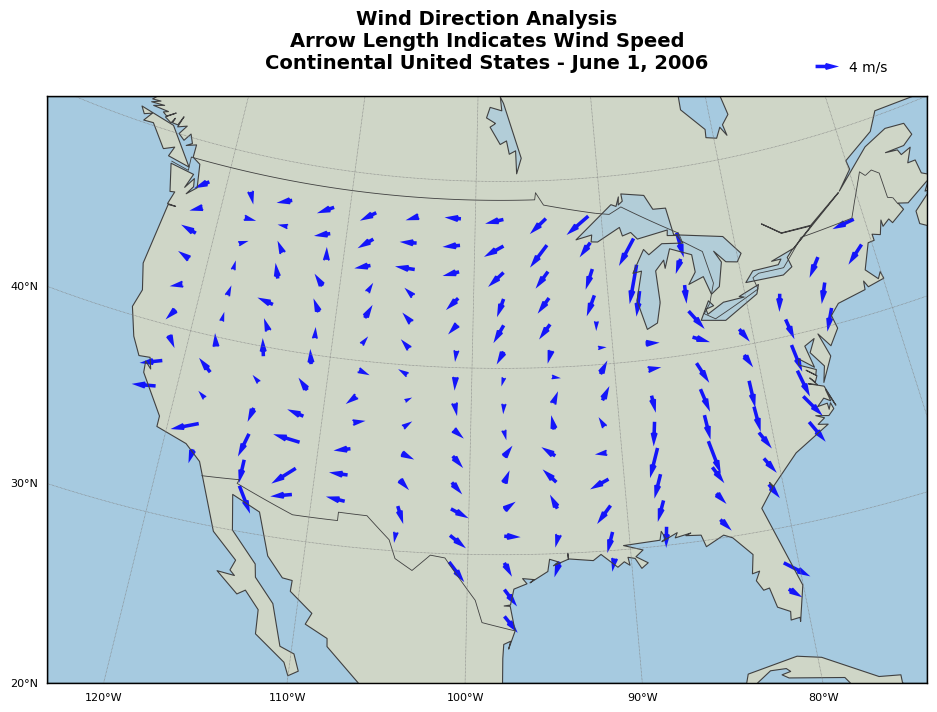

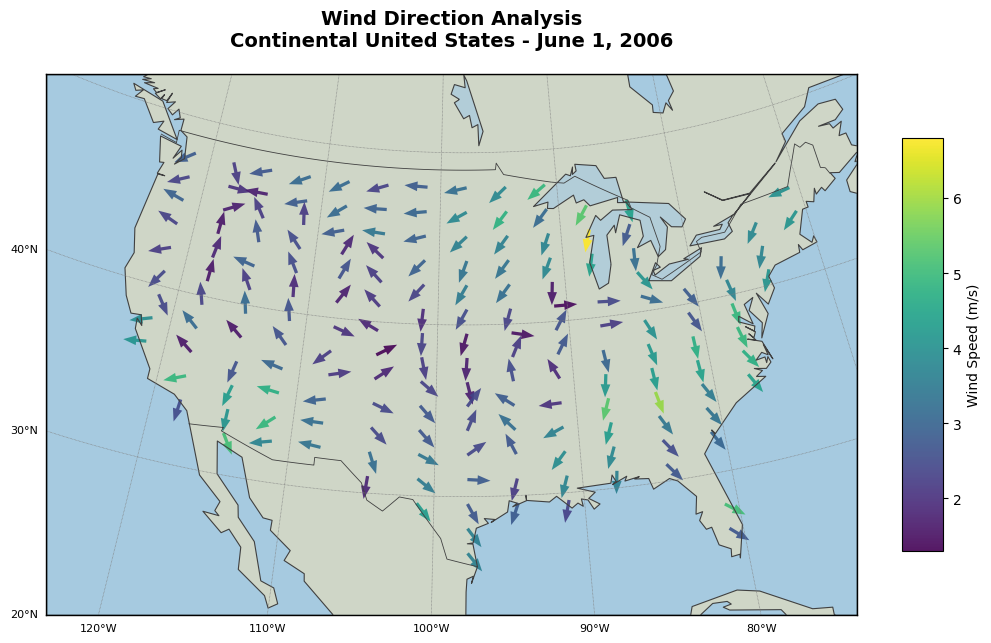

In [20]:
plot_length()
plot_color()